Beer Run

In [61]:
#print(os.listdir(os.getcwd()))

In [62]:
#print(os.getcwd())

In [58]:
#!pip install my-package

In [59]:
#! pip install colored --upgrade

In [60]:
#! pip install termcolor

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
import csv
import sqlite3

from sqlalchemy import create_engine

from config import pgPassword
import codecs

from PIL import Image
from termcolor import colored


import plotly as py

# Any results you write to the current directory are saved as output.

In [21]:
#import csv
beer_df = pd.read_csv('data/beers.csv')
brewery_df = pd.read_csv('data/breweries.csv')
GlobalBeer_df = pd.read_csv('data/open-beer-database.csv')
#recipe = pd.read_csv('data/recipeData.csv')
with codecs.open("data/recipeData.csv", "r",encoding='utf-8', errors='ignore') as fdata:
    brrecipe_df = pd.read_csv(fdata)

In [20]:
targetColumns = ["Name", "id", "Alcohol_By_Vol", "International_Bitterness_Units", "Style", "style_id", "Category","Brewer","brewery_id", "Address", "City", "State", "Country", "Coordinates"]
GlobalBeer_df = GlobalBeer_df[targetColumns]
GlobalBeer_df = GlobalBeer.drop_duplicates(subset=['id'])
GlobalBeer_df.sort_values(by=["id"]).head(500)

,Name,id,brewery_id,cat_id,style_id,Alcohol_By_Vol,International_Bitterness_Units,Standard_Reference_Method,Universal_Product_Code,Description,add_user,last_mod,Style,Category,Brewer,Address,City,State,Country,Coordinates
391,Hocus Pocus,1,812,11,116,5,0,0,0.0,Our take on a classic summer ale. A toast to ...,0,2010-07-23T01:30:00+05:30,Light American Wheat Ale or Lager,Other Style,Magic Hat,5 Bartlett Bay Road,South Burlington,Vermont,United States,"44.4284, -73.2131"
473,Grimbergen Blonde,2,264,-1,-1,7,0,0,0.0,na,0,2010-07-23T01:30:00+05:30,na,na,Brouwerij Alken-Maes,Rue Derbque 7,Jumet,Hainaut,Belgium,"50.4431, 4.4147"
2937,Widdershins Barleywine,3,779,-1,-1,9,0,0,0.0,na,0,2010-07-23T01:30:00+05:30,na,na,Left Hand Brewing Company,1265 Boston Avenue,Longmont,Colorado,United States,"40.1587, -105.113"
2938,Lucifer,4,287,-1,-1,9,0,0,0.0,na,0,2010-07-23T01:30:00+05:30,na,na,Brouwerij Liefmans,200 Aalststraat,Oudenaarde,Oost-Vlaanderen,Belgium,"50.8439, 3.617"
2082,Bitter,5,1056,-1,-1,4,0,0,0.0,na,0,2010-07-23T01:30:00+05:30,na,na,Ridgeway Brewing,6 Chapel Close,South Stoke,Oxford,United Kingdom,"51.5462, -1.1355"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317,Teton Ale,496,594,3,33,0,0,0,0.0,na,0,2010-07-23T01:30:00+05:30,American-Style Amber/Red Ale,North American Ale,Grand Teton Brewing #2,430 Old Jackson Highway,Victor,Idaho,United States,"43.5984, -111.108"
2105,Pilsener,497,534,-1,-1,5,0,0,0.0,na,0,2010-07-23T01:30:00+05:30,na,na,Flensburger Brauerei,Munketoft 12,Flensburg,Schleswig-Holstein,Germany,"54.779, 9.4355"
1254,Nickelbier,498,230,7,90,7,0,0,0.0,na,0,2010-07-23T01:30:00+05:30,Traditional German-Style Bock,German Lager,Brauhaus Johann Albrecht - Konstanz,Konradigasse 2,Konstanz,Baden-Wrttemberg,Germany,"47.6651, 9.175"
2318,Edel-Pils,499,216,-1,-1,5,0,0,0.0,na,0,2010-07-23T01:30:00+05:30,na,na,Brauerei Leibinger,Friedhofstrae 20-36,Ravensburg,Baden-Wrttemberg,Germany,"47.7818, 9.6215"


In [50]:
#brrecipe.describe()

In [23]:
brrecipe_df = brrecipe_df[["BeerID", "Name", "Style", "StyleID","OG", "FG", "ABV","IBU", "Color", "Efficiency", "BrewMethod" ]]
brrecipe_df = brrecipe_df.drop_duplicates(subset=['BeerID'])


brrecipe_df.head()

,BeerID,Name,Style,StyleID,OG,FG,ABV,IBU,Color,Efficiency,BrewMethod
0,1,Vanilla Cream Ale,Cream Ale,45,1.055,1.013,5.48,17.65,4.83,70.0,All Grain
1,2,Southern Tier Pumking clone,Holiday/Winter Special Spiced Beer,85,1.083,1.021,8.16,60.65,15.64,70.0,All Grain
2,3,Zombie Dust Clone - EXTRACT,American IPA,7,1.063,1.018,5.91,59.25,8.98,70.0,extract
3,4,Zombie Dust Clone - ALL GRAIN,American IPA,7,1.061,1.017,5.80,54.48,8.50,70.0,All Grain
4,5,Bakke Brygg Belgisk Blonde 50 l,Belgian Blond Ale,20,1.060,1.010,6.48,17.84,4.57,72.0,All Grain


In [5]:
beer_df.describe()
beer_df.head(10)


,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
5,5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
6,6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0
7,7,0.065,NaN,2259,Foreman,American Porter,177,12.0
8,8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0
9,9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0


In [6]:
brewery.describe()
brewery.head(10)

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
5,5,COAST Brewing Company,Charleston,SC
6,6,Great Divide Brewing Company,Denver,CO
7,7,Tapistry Brewing,Bridgman,MI
8,8,Big Lake Brewing,Holland,MI
9,9,The Mitten Brewing Company,Grand Rapids,MI


In [7]:
brewery.groupby('state')['state'].count().sort_values(ascending=False).head(3)
print(colored("Top 3 States with Maximum Breweries for Craft Canned Beers:",'blue'))
#Manually converting state initials to names
print(colored("1. Colorado",'green'))
print(colored("2. California",'green'))
print(colored("3. Michigan",'green'))

Top 3 States with Maximum Breweries for Craft Canned Beers:
1. Colorado
2. California
3. Michigan


Alcohol Content

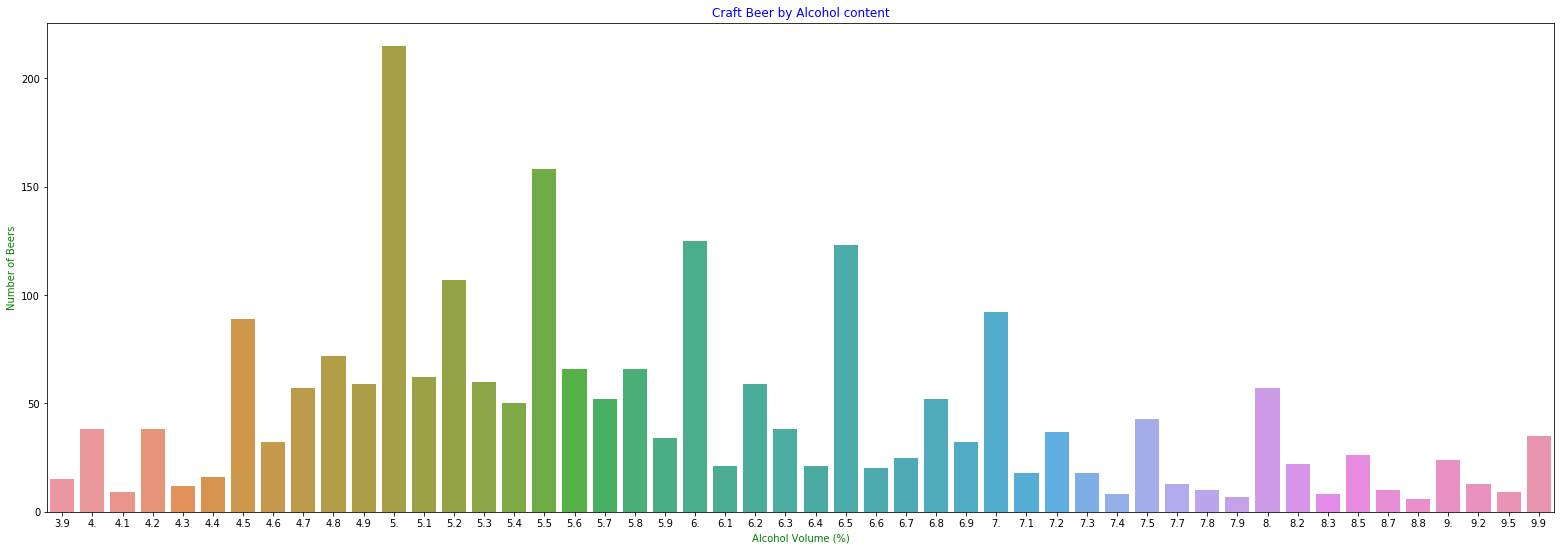

In [8]:
temp = beer_df.groupby('abv')["name"].count().sort_values(ascending=False).head(50)

#Craft Beers Alcohol content
x = list(temp.index.values)
for i in range(len(x)):
    x[i] = np.format_float_positional(np.float16(x[i]*100))
y = temp.values

fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 27
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
sns.barplot(x,y)
plt.xlabel("Alcohol Volume (%)",color='green')
plt.ylabel("Number of Beers",color='green')
plt.title("Craft Beer by Alcohol content", color='blue')
plt.show()
#np.format_float_positional(np.float16(np.pi))

Craft Beers

Text(0.5, 1, 'Craft Beers -- Bitterness vs Alcohol Content ')

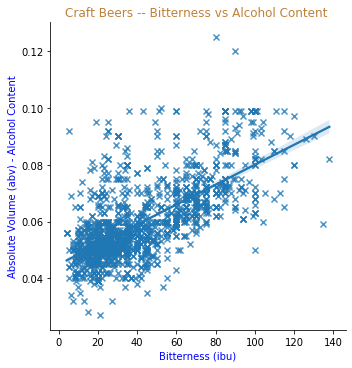

In [9]:
beertemp = beer_df
beertemp.dropna(inplace=True)
sns.lmplot("ibu","abv", data=beertemp,markers="x")
plt.xlabel("Bitterness (ibu)",color='blue')
plt.ylabel("Absolute Volume (abv) - Alcohol Content",color='blue')
plt.title("Craft Beers -- Bitterness vs Alcohol Content ", color='#BE823A')

"Does some Beer are highly Bitter & some have high Alcohol Content?

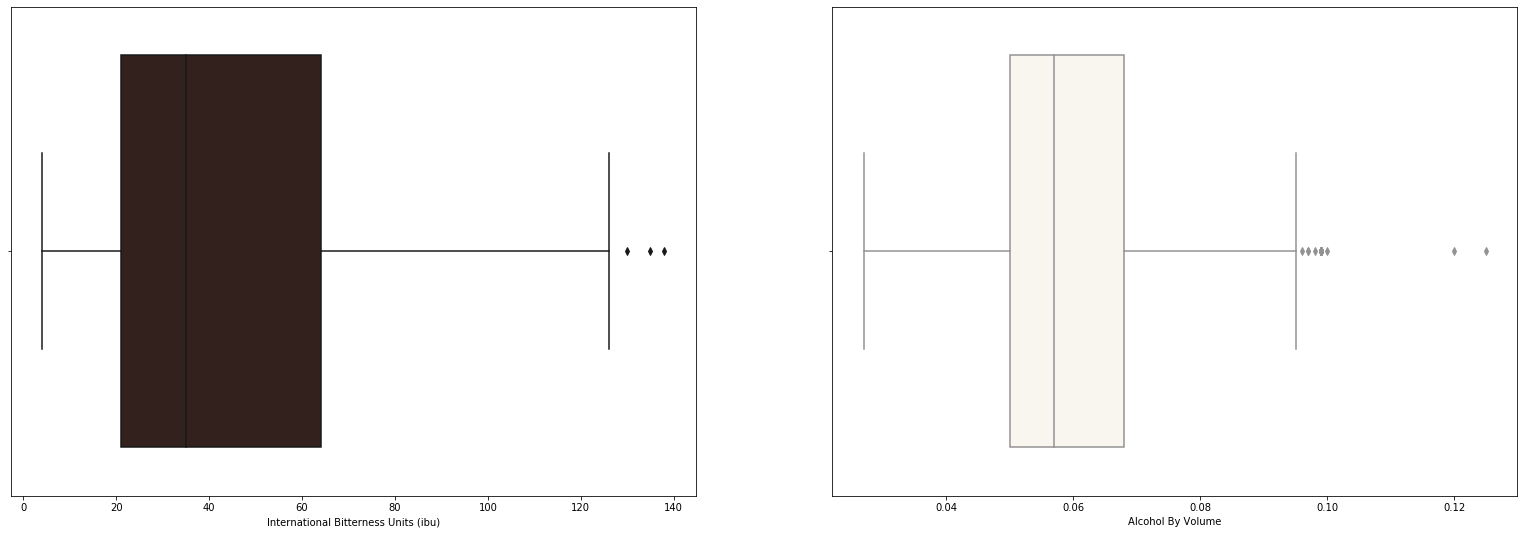

In [10]:
fig = plt.figure()

plt.subplot(1, 2, 1)
sns.boxplot(beertemp["ibu"],color='#361F1B')
plt.xlabel("International Bitterness Units (ibu)")

plt.subplot(1, 2, 2)
sns.boxplot(beertemp["abv"],color='#fbf7ed')
plt.xlabel("Alcohol By Volume")

plt.show()

Can I get a Craft Beer with high Alcohol Content and Average Bitterness?

In [11]:
HighBeer = beertemp.sort_values("abv",ascending=False)
AvgBitterness = beertemp["ibu"].mean()
HighBeer = HighBeer[HighBeer["ibu"]<=AvgBitterness].reset_index().head(1)
HighBeer[["name","style"]]

,name,style
0,Bourbon Barrel Batch 666: Sympathy for the Devil,Belgian Dark Ale


How do they Brew It!

In [46]:
#Most Popular Brew Method -- using the New Dataset of Beer Recipes
#beertemp["BrewMethod"].value_counts()
#Its description
brrecipe[brrecipe["BrewMethod"]=="All Grain"].describe()

,BeerID,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp,UserId
count,49692.000000,49692.000000,49692.000000,49692.000000,49692.000000,49692.000000,49692.000000,49692.000000,49692.000000,49692.000000,47778.000000,49692.000000,43997.000000,23776.000000,34416.000000,15760.000000
mean,37141.468888,60.733458,55.385971,1.521160,1.096691,6.167252,44.337812,13.467283,63.708933,66.829087,1.444086,70.843870,2.127235,0.778188,19.092941,41415.319226
std,21207.146561,56.794964,217.863068,2.526868,0.500351,1.834325,43.779428,12.005434,232.968753,15.192668,2.166086,8.152118,1.682347,0.395031,4.433359,27448.957678
min,1.000000,1.000000,1.000000,1.000000,-0.003000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.780000,87.000000
25%,18921.500000,10.000000,19.870000,1.051000,1.011000,5.110000,23.580000,5.170000,25.000000,60.000000,1.040000,70.000000,1.500000,0.500000,18.000000,19531.000000
50%,37341.500000,36.000000,20.820000,1.058000,1.014000,5.830000,35.790000,8.430000,28.390000,60.000000,1.046000,70.000000,1.500000,0.750000,20.000000,40486.000000
75%,55412.250000,111.000000,26.500000,1.070000,1.017000,6.870000,56.370000,16.850000,33.000000,70.000000,1.055000,75.000000,3.000000,1.000000,20.000000,56185.000000
max,73860.000000,176.000000,9200.000000,34.034500,23.424600,53.810000,3409.300000,95.590000,9700.000000,240.000000,45.900000,100.000000,100.000000,2.000000,114.000000,134362.000000


<Figure size 2160x2160 with 0 Axes>

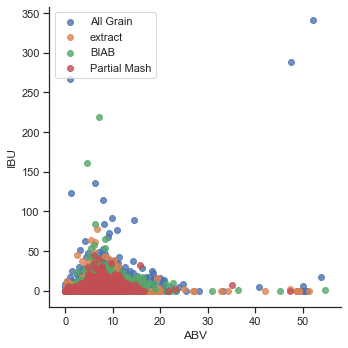

In [48]:
brtemp = brrecipe_df.fillna(0)
brtemp["IBU"]=brtemp["IBU"]/10
plt.figure(figsize=(30 ,30))
sns.lmplot( x="ABV",y="IBU",  data=brtemp, fit_reg=False, hue='BrewMethod', legend=False)
plt.legend(loc='upper left')

plt.show()

How does different factors in Beer Production correlate with each other!

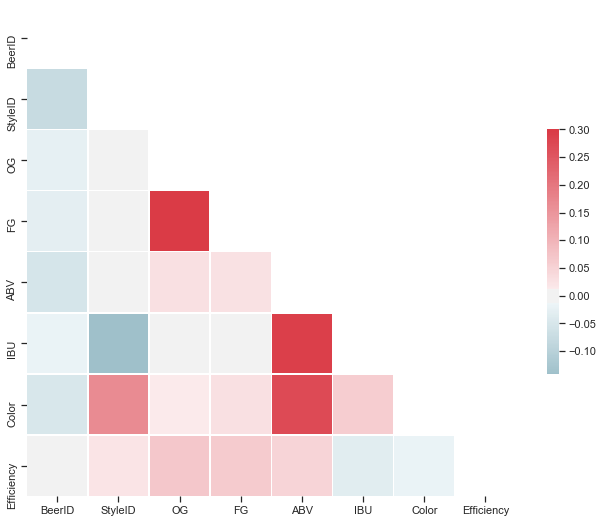

In [49]:
#how does different factor in Beer Production correlate with each other 
# Compute the correlation matrix
corr = brrecipe_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Look at Some Major Factors in Beer Preparation

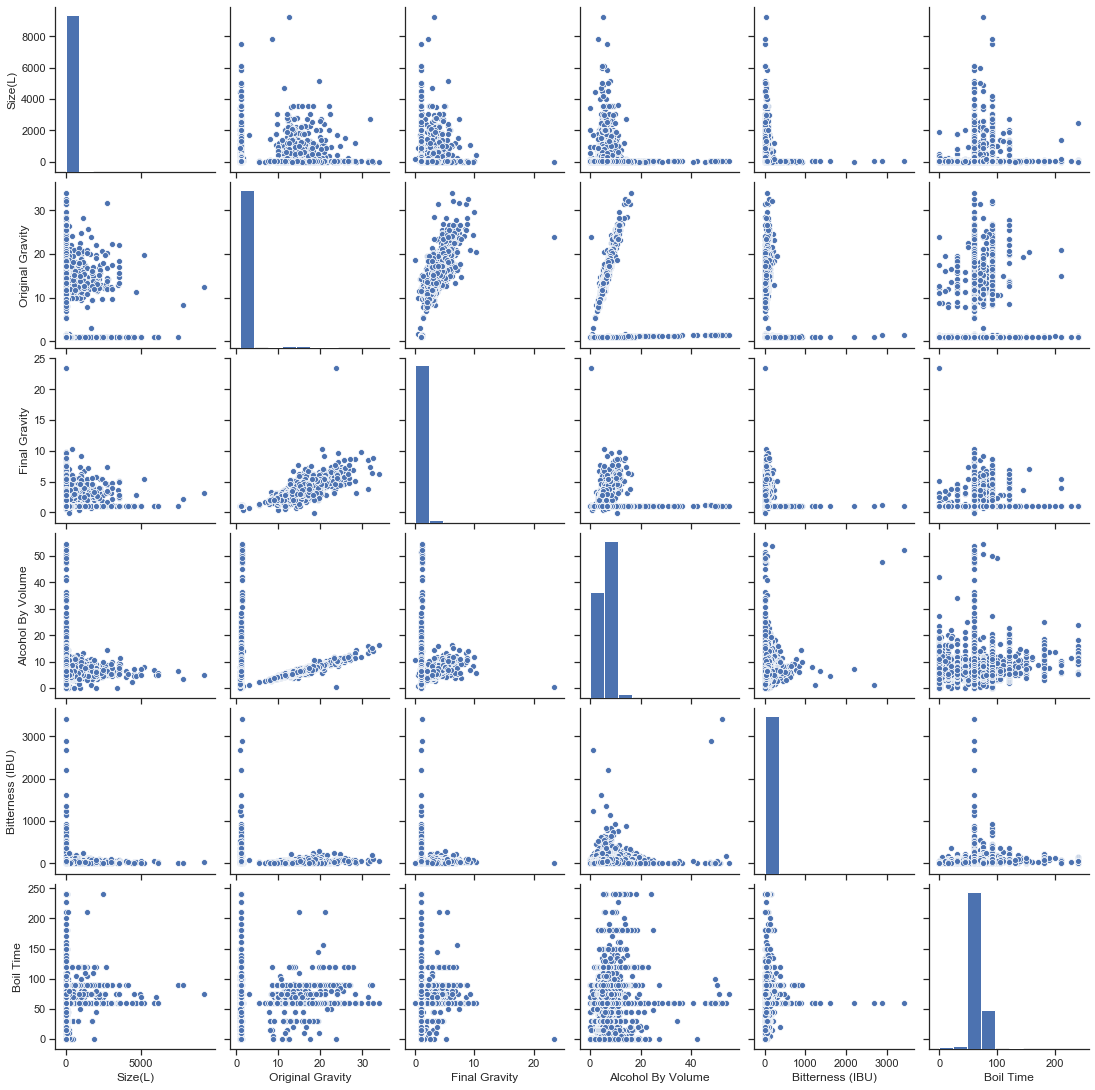

In [15]:
#Data Prep for PairPlot
brr = brrecipe.iloc[:,5:10]
brr["Boil Time"] = brrecipe["BoilTime"]
brr = brr.rename(columns={"OG": "Original Gravity", "FG": "Final Gravity", "ABV":"Alcohol By Volume", "IBU":"Bitterness (IBU)"})
brr.fillna(0,inplace=True)

#plot Prep 
sns.set(style="ticks", color_codes=True)
sns.pairplot(brr)

Alcohol Content in Beers

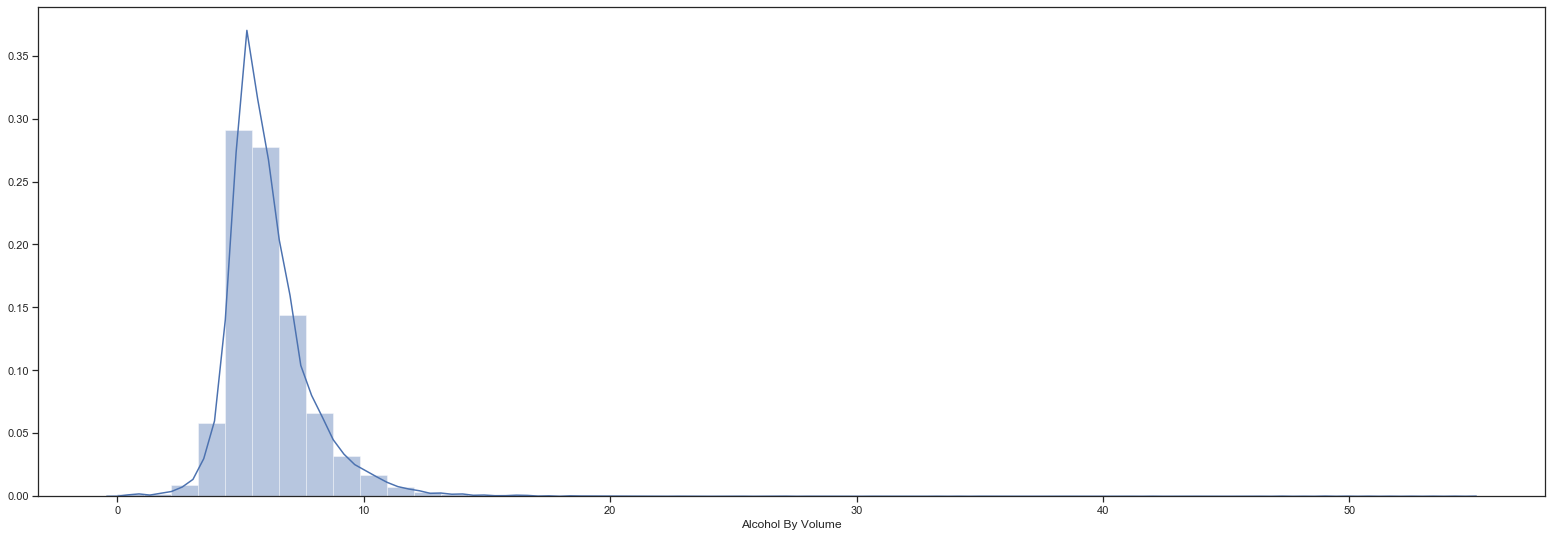

In [17]:
sns.distplot(brrecipe["ABV"])
plt.xlabel("Alcohol By Volume")
plt.show()

# Create a connection to SQL database

In [24]:
pg_user = 'postgres'
pg_password = pgPassword
db_name = 'beersDB'

connection_string = f"{pg_user}:{pg_password}@localhost:5432/{db_name}"
engine = create_engine(f'postgresql://{connection_string}')

In [44]:
engine.table_names()

['beers', 'openBeer', 'openbeer', 'breweries', 'recipes']

In [26]:
beer_df.to_sql(name = "beers", con=engine, if_exists='append', index=False)

In [35]:
GlobalBeer_df.to_sql(name = "openBeer", con=engine, if_exists='append', index=False)

In [36]:
pd.read_sql_query('select * from openBeer', con=engine).head()

,Name,id,brewery_id,cat_id,style_id,Alcohol_By_Vol,International_Bitterness_Units,Standard_Reference_Method,Universal_Product_Code,Description,add_user,last_mod,Style,Category,Brewer,Address,City,State,Country,Coordinates
0,Scottish Ale,1495,347,1,15,6,0,0,0.0,na,0,2010-07-23T01:30:00+05:30,Scotch Ale,British Ale,Carlyle Brewing,215 East State Street,Rockford,Illinois,United States,"42.2689, -89.0907"
1,Het Kapittel Pater,1509,301,-1,-1,0,0,0,0.0,na,0,2010-07-23T01:30:00+05:30,Brown Ale - Belgian Dark,na,Brouwerij Van Eecke,Douvieweg 2,Watou,West-Vlaanderen,Belgium,"50.8612, 2.6615"
2,Export Premium,1516,785,-1,-1,5,0,0,0.0,na,0,2010-07-23T01:30:00+05:30,na,na,Licher Privatbrauerei,In den Hardtberggrten,Lich,Hessen,Germany,"50.5208, 8.8166"
3,Bee Sting Honey Ale,1527,604,3,26,6,0,0,0.0,na,0,2010-07-23T01:30:00+05:30,American-Style Pale Ale,North American Ale,Great Divide Brewing,2201 Arapahoe Street,Denver,Colorado,United States,"39.7539, -104.989"
4,PranQster Belgian Ale,1540,919,-1,-1,8,0,0,0.0,Pranqster\n\nBelgian Style Golden Ale\n\n\nBel...,0,2010-07-23T01:30:00+05:30,na,na,North Coast Brewing Company,455 North Main Street,Fort Bragg,California,United States,"39.4466, -123.806"


In [38]:
brewery_df.to_sql(name = "breweries", con=engine, if_exists='append', index=False)

In [39]:
pd.read_sql_query('select * from breweries', con=engine).head()

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


In [42]:
brrecipe_df.to_sql(name = "recipes", con=engine, if_exists='append', index=False)

In [43]:
pd.read_sql_query('select * from recipes', con=engine).head()

,BeerID,Name,Style,StyleID,OG,FG,ABV,IBU,Color,Efficiency,BrewMethod
0,1,Vanilla Cream Ale,Cream Ale,45,1.055,1.013,5.48,17.65,4.83,70.0,All Grain
1,2,Southern Tier Pumking clone,Holiday/Winter Special Spiced Beer,85,1.083,1.021,8.16,60.65,15.64,70.0,All Grain
2,3,Zombie Dust Clone - EXTRACT,American IPA,7,1.063,1.018,5.91,59.25,8.98,70.0,extract
3,4,Zombie Dust Clone - ALL GRAIN,American IPA,7,1.061,1.017,5.80,54.48,8.50,70.0,All Grain
4,5,Bakke Brygg Belgisk Blonde 50 l,Belgian Blond Ale,20,1.060,1.010,6.48,17.84,4.57,72.0,All Grain
